In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader, loss
from Train import train
from Model import Model

In [2]:
#imdir_rs19 = '/home/physik/Dokumente/rs19/jpgs/rs19_val'
#maskdir_rs19 = '/home/physik/Dokumente/rs19/uint8/rs19_val'
imdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/jpgs/rs19_val'
maskdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/uint8/rs19_val'
classes_ = {"rail-track","tram-track"}#,"rail-raised","rail-embedded"}
range_train = (0,4999)
range_test = (5000,7499)
range_val = (7500,8499)
img_size = (1024,512)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_,
                      img_size = img_size)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_,
                      img_size = img_size)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_,
                      img_size = img_size)

In [4]:
traindata[0][1].shape

torch.Size([3, 512, 1024])

In [5]:
traindata[0][1][0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [6]:
traindata[0][0].shape

torch.Size([3, 512, 1024])

In [7]:
traindata[0][1].dtype

torch.float32

In [8]:
len(traindata)

5000

In [9]:
len(testdata)

2500

In [10]:
len(valdata)

1000

In [12]:
batchsize = 2
lossf = loss.BCEDiceLoss(lambda_dice=0.4,lambda_bce=0.6)
optim = 'RMSprop'
lr = 0.0001
momentum = 0.01
decay_rate = 0.9
decay_steps = 10
num_epochs = 20
model_path = "/home/physik/Model_19122022_2"

In [13]:
model = Model.UNet(num_classes=3,p_dropout=0.3)#,img_size=(256,512))#,enc_channels=(3,64,128,256,512,1024),dec_channels=(1024,512,256,128,64),img_size=(512,1024))

In [14]:
model = model.to('cuda')

In [15]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         lossf,
                         optim,
                         batchsize,
                         lr,
                         momentum,
                         decay_rate,
                         decay_steps,
                         num_epochs,
                         model_path)

In [16]:
Trainer.train()
Trainer.save()

Epoch: 1/20
Train loss: 0.160543, Test loss: 0.1117, Learning rate: 0.000100
Epoch: 2/20
Train loss: 0.085230, Test loss: 0.1458, Learning rate: 0.000100
Epoch: 3/20
Train loss: 0.076967, Test loss: 0.0781, Learning rate: 0.000100
Epoch: 4/20
Train loss: 0.072364, Test loss: 0.0791, Learning rate: 0.000100
Epoch: 5/20
Train loss: 0.069447, Test loss: 0.0784, Learning rate: 0.000100
Epoch: 6/20
Train loss: 0.066881, Test loss: 0.0754, Learning rate: 0.000100
Epoch: 7/20
Train loss: 0.064943, Test loss: 0.0737, Learning rate: 0.000100
Epoch: 8/20
Train loss: 0.063252, Test loss: 0.0766, Learning rate: 0.000100
Epoch: 9/20
Train loss: 0.061332, Test loss: 0.0769, Learning rate: 0.000100
Epoch: 10/20
Train loss: 0.059624, Test loss: 0.0799, Learning rate: 0.000100
Epoch: 11/20
Train loss: 0.057652, Test loss: 0.0842, Learning rate: 0.000090
Epoch: 12/20
Train loss: 0.056597, Test loss: 0.0828, Learning rate: 0.000090
Epoch: 13/20
Train loss: 0.055317, Test loss: 0.0823, Learning rate: 0.00

In [17]:
Trainer.val()

Average Validation Loss: 0.1142

Average Validation Accuracy: 0.9715



In [ ]:
#model.eval()

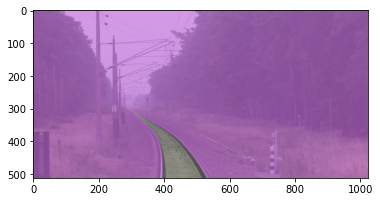

In [39]:
v = 86
loader.visualize_result(valdata[v][0],valdata[v][1][2,:,:])

In [40]:
prediction = model.predict(valdata[v][0].unsqueeze(0).to('cuda'))

In [41]:
prediction[2].shape

torch.Size([1, 3, 512, 1024])

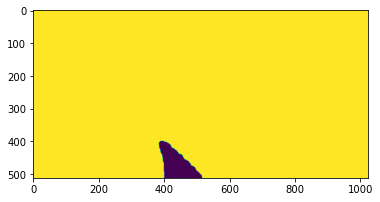

In [44]:
plt.imshow(prediction[1][0][2].cpu().detach().numpy())

In [ ]:
result = torch.sigmoid(model(valdata[v][0].unsqueeze(0).to('cuda')))

In [ ]:
plt.imshow(result.cpu().detach().numpy()[0][1])

In [ ]:
result[result>=0.5]=1.

In [ ]:
loader.visualize_result(valdata[v][0],result[0][0])

In [ ]:
torch.min(result)

In [ ]:
torch.max(result)

In [ ]:
result.shape

In [ ]:
zeros = torch.zeros((1,1080,1920))

In [ ]:
loss(result[0],traindata[0][1])

In [ ]:
Trainer.model_path = "/home/physik/Model_16122022_1"

In [ ]:
Trainer.save()

In [ ]:
Trainer.load()

In [ ]:
loss.dice_score(traindata[0][1],traindata[0][1],None)

In [ ]:
loss.dice_score(result,traindata[0][1],None)

In [ ]:
import gc
gc.collect()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
for img,mask in Trainer.trainloader:
    print (img.shape)

In [ ]:
img = img.to('cuda')

In [ ]:
img.device

In [ ]:
del img

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainloader = DataLoader(traindata, batch_size = 2, shuffle = True, num_workers = 1)

In [ ]:
for (img,mask) in trainloader:
    print(mask.shape)